In [1]:
# Reading the dataset
import pandas as pd
import numpy as np
CarPricesDataNumeric=pd.read_pickle('CarPricesDataNumeric.pkl')
print('Shape before deleting duplicate values:', CarPricesDataNumeric.shape)

# Removing duplicate rows if any
CarPricesDataNumeric=CarPricesDataNumeric.drop_duplicates()
print('Shape After deleting duplicate values:', CarPricesDataNumeric.shape)

CarPricesDataNumeric.head()
# Start observing the Quantitative/Categorical/Qualitative variables

Shape before deleting duplicate values: (1428, 12)
Shape After deleting duplicate values: (1428, 12)


,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0


In [2]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Age']
X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1142, 1)
(1142,)
(286, 1)
(286,)


In [4]:
# Printing first 5 rows from training data
X_train[0:5]

array([[44.],
       [75.],
       [22.],
       [33.],
       [58.]])

## Simple Linear Regression
When only one predictor is used

In [5]:
# Simple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy on Test Data:',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))


# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)


TestingDataResults['APE']=100* ((abs(TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])
MAPE=TestingDataResults['APE'].mean()



TestingDataResults.head()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 Value: 0.7749232020344389
Accuracy on Test Data: 88.63693816806311


,Age,Price,PredictedPrice,APE
0,20.0,16500,16716.0,1.309091
1,76.0,8950,7367.0,17.687151
2,56.0,11950,10706.0,10.410042
3,39.0,12695,13544.0,6.687672
4,68.0,8900,8702.0,2.224719


In [9]:
print('The value of slope is: ',LREG.coef_)
print('The value of Intercept is: ',LREG.intercept_)

The value of slope is:  [-166.94472579]
The value of Intercept is:  20054.44944297562


### Using above slope and intercept, Equation of our Simple Linear regression model becomes
<b> Price = -166.99 * Age + 20065.11 </b>

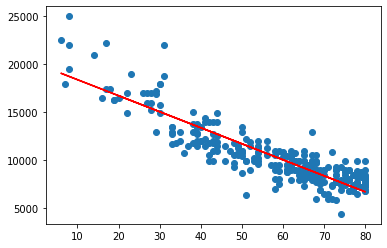

In [10]:
# Visualizing the line of best fit
import matplotlib.pyplot as plt
plt.scatter(x=TestingDataResults['Age'] , y=TestingDataResults['Price'])
plt.plot(TestingDataResults['Age'] , TestingDataResults['PredictedPrice'], color='red')

In [11]:
TargetVariable1='Price'
Predictors1=['KM']
X=CarPricesDataNumeric[Predictors1].values
y=CarPricesDataNumeric[TargetVariable1].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
RegModel1 = LinearRegression()
LREG1=RegModel1.fit(X_train,y_train)
prediction1=LREG1.predict(X_test)
print('R2 Value:',metrics.r2_score(y_train, LREG1.predict(X_train)))
print('Accuracy on Test Data:',100- (np.mean(np.abs((y_test - prediction1) / y_test)) * 100))
print('The value of slope is: ',LREG1.coef_)
print('The value of Intercept is: ',LREG1.intercept_)

R2 Value: 0.3343221167345569
Accuracy on Test Data: 79.26306479721842
The value of slope is:  [-0.05509319]
The value of Intercept is:  14512.042654713323


In [12]:
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors1)
TestingDataResults[TargetVariable1]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction1)
TestingDataResults.head()

,KM,Price,PredictedPrice
0,35000,16500,12584.0
1,89520,8950,9580.0
2,66777,11950,10833.0
3,24723,12695,13150.0
4,35000,8900,12584.0
